# Create Ultralytics Hub

In [1]:
from waffle_hub.hub.adapter.ultralytics import UltralyticsHub
from waffle_hub import TaskType

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:16: UserWarning: 
            torch 1.13.1+cu117 has not been tested.
            We recommend you to use one of ['1.13.1']
            
  warnings.warn(
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:56: UserWarning: 
                ultralytics 8.0.91 has not been tested.
                We recommend you to use one of ['8.0.87']
                
  warnings.warn(


In [2]:
UltralyticsHub.MODEL_TYPES

{'object_detection': {'yolov8': ['n', 's', 'm', 'l', 'x']},
 'classification': {'yolov8': ['n', 's', 'm', 'l', 'x']},
 'instance_segmentation': {'yolov8': ['n', 's', 'm', 'l', 'x']}}

In [3]:
ultralytics_hub = UltralyticsHub.new(
    name="ultralytics_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="yolov8",
    model_size="n",
    categories=["1", "2"]
)

In [4]:
ultralytics_hub.categories

[{'supercategory': 'object', 'name': '1'},
 {'supercategory': 'object', 'name': '2'}]

# Create Huggingface Hub 

In [5]:
from waffle_hub.hub.adapter.hugging_face import HuggingFaceHub
from waffle_hub import TaskType

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:56: UserWarning: 
                transformers 4.28.1 has not been tested.
                We recommend you to use one of ['4.27.4']
                
  warnings.warn(


In [6]:
HuggingFaceHub.MODEL_TYPES

{'object_detection': {'DETA': {'base': 'jozhang97/deta-resnet-50'},
  'DETR': {'base': 'facebook/detr-resnet-50',
   'large': 'facebook/detr-resnet-101'},
  'YOLOS': {'tiny': 'hustvl/yolos-tiny'}},
 'classification': {'ViT': {'tiny': 'WinKawaks/vit-tiny-patch16-224',
   'base': 'google/vit-base-patch16-224'}}}

In [7]:
huggingface_hub = HuggingFaceHub.new(
    name="huggingface_mnist_detection",
    task=TaskType.OBJECT_DETECTION,
    model_type="DETR",
    model_size="base",
    categories=["1", "2"]
)

# Train

## Load Dataset

In [8]:
from waffle_hub.dataset import Dataset
from waffle_hub import DataType

dataset = Dataset.load("mnist_det")

## Ultralytics

In [9]:
dataset_dir = dataset.export(DataType.YOLO)
train_result = ultralytics_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16
)
train_result

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/dataset/dataset.py:1051: UserWarning: datasets/mnist_det/exports/YOLO already exists. Removing exist export and override.
  warnings.warn(f"{export_dir} already exists. Removing exist export and override.")
Ultralytics YOLOv8.0.91 🚀 Python-3.9.16 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4090, 24215MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/lhj/ws/dev/waffle/datasets/mnist_det/exports/YOLO/data.yaml, epochs=50, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=0, workers=2, project=hubs/ultralytics_mnist_detection, name=artifacts, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False

TrainResult(best_ckpt_file=PosixPath('hubs/ultralytics_mnist_detection/weights/best_ckpt.pt'), last_ckpt_file=PosixPath('hubs/ultralytics_mnist_detection/weights/last_ckpt.pt'), metrics=[[{'tag': 'epoch', 'value': 0.0}, {'tag': 'train/box_loss', 'value': 1.519}, {'tag': 'train/cls_loss', 'value': 4.1718}, {'tag': 'train/dfl_loss', 'value': 1.0838}, {'tag': 'metrics/precision(B)', 'value': 0.00223}, {'tag': 'metrics/recall(B)', 'value': 0.66667}, {'tag': 'metrics/mAP50(B)', 'value': 0.01552}, {'tag': 'metrics/mAP50-95(B)', 'value': 0.01359}, {'tag': 'val/box_loss', 'value': 0.51572}, {'tag': 'val/cls_loss', 'value': 3.5799}, {'tag': 'val/dfl_loss', 'value': 0.84739}, {'tag': 'lr/pg0', 'value': 0.0964}, {'tag': 'lr/pg1', 'value': 0.0004}, {'tag': 'lr/pg2', 'value': 0.0004}], [{'tag': 'epoch', 'value': 1.0}, {'tag': 'train/box_loss', 'value': 1.4765}, {'tag': 'train/cls_loss', 'value': 4.0175}, {'tag': 'train/dfl_loss', 'value': 1.0779}, {'tag': 'metrics/precision(B)', 'value': 0.00222}, 

## Huggingface

In [10]:
import torch
torch.use_deterministic_algorithms(False)

In [11]:
dataset_dir = dataset.export(DataType.HUGGINGFACE)
train_result = huggingface_hub.train(
    dataset_dir,
    image_size=320,
    epochs=50,
    batch_size=16
)
train_result

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/dataset/dataset.py:1051: UserWarning: datasets/mnist_det/exports/HUGGINGFACE already exists. Removing exist export and override.
  warnings.warn(f"{export_dir} already exists. Removing exist export and override.")
Found cached dataset generator (/home/lhj/.cache/huggingface/datasets/generator/default-86efa360c0c5058c/0.0.0)
Found cached dataset generator (/home/lhj/.cache/huggingface/datasets/generator/default-40edd7d2fd7e70a2/0.0.0)
Found cached dataset generator (/home/lhj/.cache/huggingface/datasets/generator/default-8f0de55896cb4705/0.0.0)
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of DetrForObjectDetection were not initialized from the model checkpoint at

Epoch,Training Loss,Validation Loss
1,No log,1.327695


TrainResult(best_ckpt_file=PosixPath('hubs/huggingface_mnist_detection/weights/best_ckpt'), last_ckpt_file=PosixPath('hubs/huggingface_mnist_detection/weights/last_ckpt'), metrics=[[{'tag': 'train_loss', 'value': 1.3276948928833008}, {'tag': 'train_runtime', 'value': 1.2183}, {'tag': 'train_samples_per_second', 'value': 65.666}, {'tag': 'train_steps_per_second', 'value': 8.208}, {'tag': 'epoch', 'value': 1.0}, {'tag': 'step', 'value': 5}, {'tag': 'loss', 'value': 1.4473}, {'tag': 'learning_rate', 'value': 4.9e-05}, {'tag': 'eval_loss', 'value': 1.2758986949920654}, {'tag': 'eval_runtime', 'value': 0.4765}, {'tag': 'eval_samples_per_second', 'value': 20.988}, {'tag': 'eval_steps_per_second', 'value': 4.198}], [{'tag': 'train_loss', 'value': 0.9963502883911133}, {'tag': 'train_runtime', 'value': 1.1847}, {'tag': 'train_samples_per_second', 'value': 67.529}, {'tag': 'train_steps_per_second', 'value': 8.441}, {'tag': 'epoch', 'value': 2.0}, {'tag': 'step', 'value': 10}, {'tag': 'loss', 'va

# Evaluate

In [12]:
ultralytics_hub = UltralyticsHub.load("ultralytics_mnist_detection")
ultralytics_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 24.37it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.8066571950912476}])

In [13]:
huggingface_hub = HuggingFaceHub.load("huggingface_mnist_detection")
huggingface_hub.evaluate("mnist_det", set_name="test")

100%|██████████| 3/3 [00:00<00:00, 21.55it/s]


EvaluateResult(metrics=[{'tag': 'mAP', 'value': 0.12699943780899048}])

# Inference

In [14]:
import PIL.Image

100%|██████████| 25/25 [00:00<00:00, 54.73it/s]


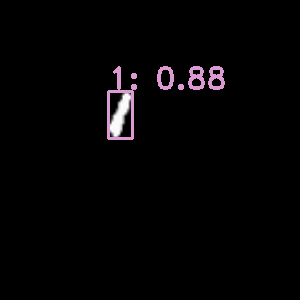

In [15]:
ultralytics_hub = UltralyticsHub.load("ultralytics_mnist_detection")
ultralytics_hub.inference("mnist/images", draw=True)
PIL.Image.open(ultralytics_hub.draw_dir / "1.png")

100%|██████████| 25/25 [00:00<00:00, 41.18it/s]


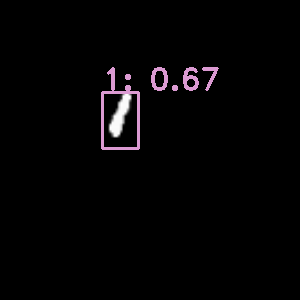

In [16]:
huggingface_hub = HuggingFaceHub.load("huggingface_mnist_detection")
huggingface_hub.inference("mnist/images", draw=True)
PIL.Image.open(huggingface_hub.draw_dir / "1.png")

# Export to onnx

In [17]:
ultralytics_hub.export()

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/ultralytics/nn/modules.py:474: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  elif self.dynamic or self.shape != shape:
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/ultralytics/yolo/utils/tal.py:241: TracerWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't change the number of iterations executed (and might lead to errors or silently give incorrect results).
  for i, stride in enumerate(strides):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/torch/onnx/utils.py:617: UserWarning: ONNX Preprocess - Removing mutation from node aten::sub_ on block input: 'tensor.1'. This changes graph semantics. (Triggered internally at ../t

ExportResult(export_file=PosixPath('hubs/ultralytics_mnist_detection/weights/model.onnx'))

In [18]:
huggingface_hub.export()

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:575: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attn_weights.size() != (batch_size * self.num_heads, target_len, source_len):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:582: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if attention_mask.size() != (batch_size, 1, target_len, source_len):
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/transformers/models/detr/modeling_detr.py:

ExportResult(export_file=PosixPath('hubs/huggingface_mnist_detection/weights/model.onnx'))